IMPORTAR LIBRERIAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


c:\Users\llgga\Personal\2025-1\AD Y VD\LAB-06-limpieza-de-datos-de-solicitudes-de-credito-lladinog\homework


CARGAR ARCHIVO

In [27]:
# Ruta relativa al archivo desde el notebook
ruta_archivo = "../files/input/solicitudes_de_credito.csv"

# Verifica dónde estás parado
print(f"Ruta actual de trabajo: {os.getcwd()}")

# Verifica si el archivo existe
if not os.path.exists(ruta_archivo):
    print(f"❌ Archivo no encontrado en la ruta: {ruta_archivo}")
    print("Contenido de la carpeta actual:")
    print(os.listdir('.'))
    print("Contenido del directorio ../files/input/:")
    print(os.listdir('../files/input') if os.path.exists('../files/input') else "No existe el directorio")
else:
    print(f"✅ Archivo encontrado: {ruta_archivo}")
    
    # Prueba de lectura sin procesar
    print("\nPrimeras 5 líneas crudas del archivo:")
    with open(ruta_archivo, 'r', encoding='utf-8', errors='replace') as f:
        for _ in range(5):
            print(f.readline())

    # Intento de leer con pandas
    try:
        import pandas as pd
        df = pd.read_csv(ruta_archivo, sep=';', encoding='utf-8')
        print("\n✅ Lectura con pandas exitosa:")
        print(df.head())
    except Exception as e:
        print("\n❌ Error al leer con pandas:")
        print(type(e).__name__, "-", e)


Ruta actual de trabajo: c:\Users\llgga\Personal\2025-1\AD Y VD\LAB-06-limpieza-de-datos-de-solicitudes-de-credito-lladinog\homework
✅ Archivo encontrado: ../files/input/solicitudes_de_credito.csv

Primeras 5 líneas crudas del archivo:
;sexo;tipo_de_emprendimiento;idea_negocio;barrio;estrato;comuna_ciudadano;fecha_de_beneficio;monto_del_credito;línea_credito

0;masculino;comercio;fabrica de ;prado;3;10.0;13/07/2018;5000000;microempresarial

1;femenino;servicio;recreativo-educativo;barrio caicedo;1;9.0;30/10/2017;6000000;microempresarial

2;femenino;comercio;tienda;aranjuez;02;4.0;3/08/2017;7300000;microempresarial

3;Masculino;comercio;variedades;cabecera san cristobal;3;60.0;20/11/2017;7000000;microempresarial


✅ Lectura con pandas exitosa:
   Unnamed: 0       sexo tipo_de_emprendimiento          idea_negocio  \
0           0  masculino               comercio           fabrica de    
1           1   femenino               servicio  recreativo-educativo   
2           2   femenino     

In [28]:
df = pd.read_csv("../files/input/solicitudes_de_credito.csv", sep=';', encoding='utf-8')

# Ver las primeras 5 filas
print(df.head())

   Unnamed: 0       sexo tipo_de_emprendimiento          idea_negocio  \
0           0  masculino               comercio           fabrica de    
1           1   femenino               servicio  recreativo-educativo   
2           2   femenino               comercio                tienda   
3           3  Masculino               comercio            variedades   
4           4   femenino               comercio           fabrica de    

                   barrio  estrato  comuna_ciudadano fecha_de_beneficio  \
0                   prado        3              10.0         13/07/2018   
1          barrio caicedo        1               9.0         30/10/2017   
2                aranjuez        2               4.0          3/08/2017   
3  cabecera san cristobal        3              60.0         20/11/2017   
4                 robledo        2               7.0         23/02/2017   

  monto_del_credito     línea_credito  
0           5000000  microempresarial  
1           6000000  microempr

INFORMACIÓN GENERAL DEL DATAFRAME

In [29]:
# Ver tamaño del DataFrame
print(df.shape)
# Ver nombres de columnas y tipos de datos
print(df.info())

# Estadísticas generales para columnas numéricas
print(df.describe())

# Estadísticas para columnas categóricas o tipo objeto
print(df.describe(include='object'))

(10920, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10920 non-null  int64  
 1   sexo                    10920 non-null  object 
 2   tipo_de_emprendimiento  10818 non-null  object 
 3   idea_negocio            10920 non-null  object 
 4   barrio                  10818 non-null  object 
 5   estrato                 10920 non-null  int64  
 6   comuna_ciudadano        10920 non-null  float64
 7   fecha_de_beneficio      10920 non-null  object 
 8   monto_del_credito       10920 non-null  object 
 9   línea_credito           10920 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 853.3+ KB
None
         Unnamed: 0       estrato  comuna_ciudadano
count  10920.000000  10920.000000      10920.000000
mean    5459.500000      2.106227         11.671703
std     3152.47680

DETECTAR VALORES NULOS

In [30]:
# Conteo de valores nulos por columna
print(df.isnull().sum())

# Porcentaje de valores nulos
print((df.isnull().mean() * 100).round(2))


Unnamed: 0                  0
sexo                        0
tipo_de_emprendimiento    102
idea_negocio                0
barrio                    102
estrato                     0
comuna_ciudadano            0
fecha_de_beneficio          0
monto_del_credito           0
línea_credito               0
dtype: int64
Unnamed: 0                0.00
sexo                      0.00
tipo_de_emprendimiento    0.93
idea_negocio              0.00
barrio                    0.93
estrato                   0.00
comuna_ciudadano          0.00
fecha_de_beneficio        0.00
monto_del_credito         0.00
línea_credito             0.00
dtype: float64


VER VALORES ÚNICOS POR COLUMNA (útil para detectar inconsistencias)

In [31]:
for col in df.columns:
    print(f"Columna: {col}")
    print(df[col].value_counts(dropna=False).head(10))  # Muestra los valores más comunes
    print('-' * 40)


Columna: Unnamed: 0
Unnamed: 0
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: count, dtype: int64
----------------------------------------
Columna: sexo
sexo
femenino     6793
masculino    3686
FEMENINO      165
Femenino      120
MASCULINO      88
Masculino      68
Name: count, dtype: int64
----------------------------------------
Columna: tipo_de_emprendimiento
tipo_de_emprendimiento
comercio        5742
servicio        2257
industria       2236
COMERCIO         175
agropecuaria     171
NaN              102
INDUSTRIA         75
Comercio          55
SERVICIO          55
Servicio          27
Name: count, dtype: int64
----------------------------------------
Columna: idea_negocio
idea_negocio
fabrica de             1757
variedades             1699
tienda                  987
comidas rapidas         904
peluqueria              594
almacen de ropa en      566
restaurante             273
mantenimiento en        204
papeleria               164
barberia           

BUSCAR DUPLICADOS

In [32]:
# Verificar filas duplicadas
print(f"Filas duplicadas: {df.duplicated().sum()}")


Filas duplicadas: 0


VISUALIZACIÓN DATA

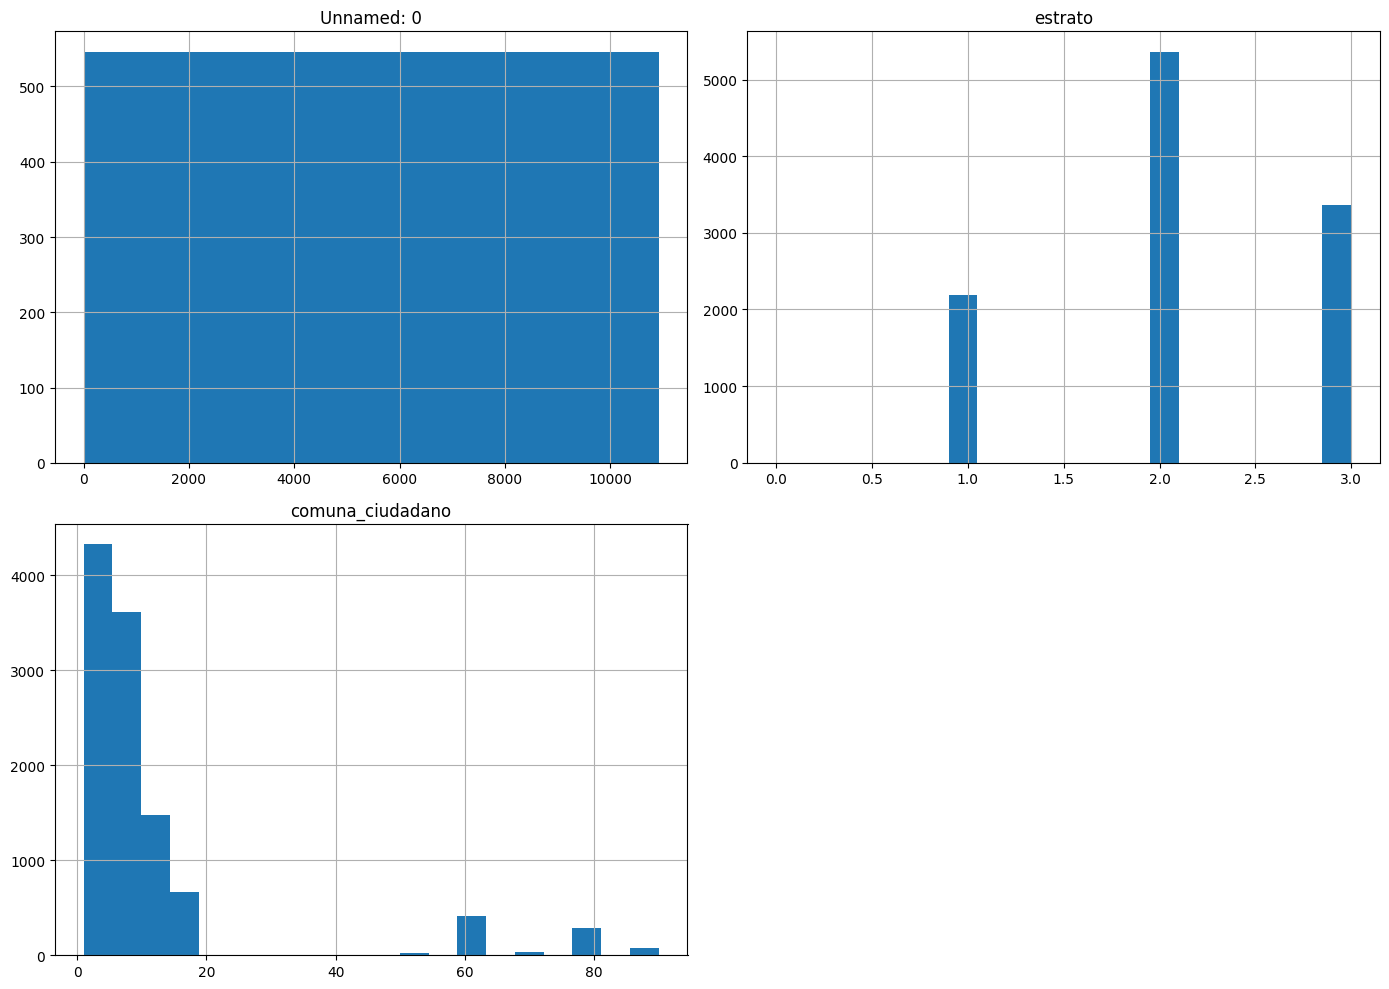

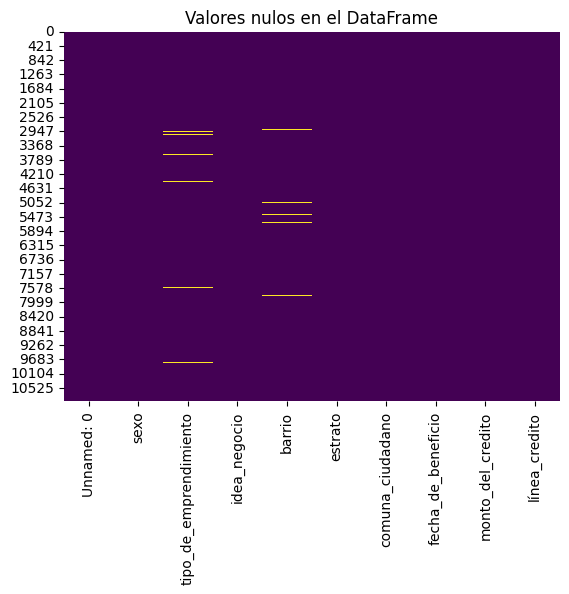

In [33]:
# Histograma para columnas numéricas
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

# Mapa de calor de nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores nulos en el DataFrame')
plt.show()


EXPLORACIÓN DE COLUMNAS

In [34]:
def explorar_columnas_object(df, max_valores_unicos=20):
    print("🔠 Exploración de columnas tipo 'object':\n")
    columnas_object = df.select_dtypes(include='object').columns

    for col in columnas_object:
        print("=" * 70)
        print(f"📌 Columna: '{col}'")
        print("- Nulos:", df[col].isnull().sum())
        print("- Total únicos:", df[col].nunique())

        valores = df[col].dropna().str.strip().str.lower()
        if df[col].nunique() <= max_valores_unicos:
            print("➡️ Posible categórica")
        else:
            print("➡️ Alta cardinalidad (texto libre o nombres únicos)")

        print("🔍 Frecuencia de valores (normalizados):")
        print(valores.value_counts().head(10))

        print("🧼 Sugerencias:")
        print("- Aplicar .str.lower() y .strip() para normalizar")
        if df[col].nunique() <= max_valores_unicos:
            print("- Convertir a dtype 'category' tras limpieza")

# Úsala así:
# explorar_columnas_object(df)


In [35]:
explorar_columnas_object(df)

🔠 Exploración de columnas tipo 'object':

📌 Columna: 'sexo'
- Nulos: 0
- Total únicos: 6
➡️ Posible categórica
🔍 Frecuencia de valores (normalizados):
sexo
femenino     7078
masculino    3842
Name: count, dtype: int64
🧼 Sugerencias:
- Aplicar .str.lower() y .strip() para normalizar
- Convertir a dtype 'category' tras limpieza
📌 Columna: 'tipo_de_emprendimiento'
- Nulos: 102
- Total únicos: 11
➡️ Posible categórica
🔍 Frecuencia de valores (normalizados):
tipo_de_emprendimiento
comercio        5972
servicio        2339
industria       2331
agropecuaria     176
Name: count, dtype: int64
🧼 Sugerencias:
- Aplicar .str.lower() y .strip() para normalizar
- Convertir a dtype 'category' tras limpieza
📌 Columna: 'idea_negocio'
- Nulos: 0
- Total únicos: 213
➡️ Alta cardinalidad (texto libre o nombres únicos)
🔍 Frecuencia de valores (normalizados):
idea_negocio
fabrica de            1852
variedades            1797
tienda                1049
comidas rapidas        952
peluqueria             627
al